In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 30

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [ ]:
my_folder = "/content/drive/MyDrive/Carrera IFI/7o Semestre/Reto3"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Carrera IFI/7o Semestre/Reto3


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [ ]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 2.7 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=32959546fab072cbf105718afd10bb3c4bb9ce3994e50fd8532f7f2a79e0d9f9
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
#%%writefile .authinfo
#oda user A01232543@tec.mx password 7315215Carlos.

Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [ ]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/Carrera IFI/7o Semestre/Reto3/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 381



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/Carrera IFI/7o Semestre/Reto3/sascfg_personal.py
WORK Path             = /saswork/SAS_work18F900005ECB_odaws01-usw2-2.oda.sas.com/SAS_work790100005ECB_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 24267


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [ ]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 04:03:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 04:03:00 PM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [ ]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [ ]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(20)

data_merge.rename(columns={"City": "Location"}, inplace = True)
#data_merge.head()


In [ ]:
#data = data_merge.sort_values(by=['AmtThisYear'],ascending=False)
#data.to_csv("Data.csv")



In [ ]:
data_merge["Recency"].describe()

count    336334.000000
mean          3.039636
std           2.120722
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: Recency, dtype: float64

In [ ]:
data_merge.groupby("Location")['AmtThisYear'].describe()


,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
City,332657.0,8.543485,84.645490,0.0,0.0,0.0,0.0,10000.0
Downtown,156694.0,9.564916,100.470585,0.0,0.0,0.0,0.0,10000.0
Rural,197978.0,4.983685,58.407038,0.0,0.0,0.0,0.0,10000.0
Suburban,312671.0,7.719312,85.104436,0.0,0.0,0.0,0.0,10000.0


## Data Exploration

In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   Location      1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

In [ ]:
def dummies(df, column):
  df = pd.concat([df, pd.get_dummies(df[column])], axis = 1)
  return df.drop(column, axis=1)

data_mergeX = dummies(data_merge, "Education")
data_mergeX = dummies(data_mergeX, "Location")

In [ ]:
#data_mergeX.drop(columns = (["LastName", "FirstName", "SeniorList", "Recency", "GaveLastYear", "GaveThisYear", "AmtThisYear"]), inplace = True)


In [ ]:
data_mergeX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1000000 non-null  float64
 1   LastName              999977 non-null   object 
 2   FirstName             999996 non-null   object 
 3   Woman                 1000000 non-null  float64
 4   Age                   1000000 non-null  float64
 5   Salary                1000000 non-null  float64
 6   SeniorList            1000000 non-null  float64
 7   NbActivities          1000000 non-null  float64
 8   Referrals             1000000 non-null  float64
 9   Recency               336334 non-null   float64
 10  Frequency             336334 non-null   float64
 11  Seniority             336334 non-null   float64
 12  TotalGift             336334 non-null   float64
 13  MinGift               336334 non-null   float64
 14  MaxGift               336334 non-nu

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [ ]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_mergeX[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  

data_mergeX[['HistoricDonor']] = data_merge[['Frequency']].notna().astype(int)
data_mergeX[['Frequency']] = data_merge[['Frequency']].fillna(value=0)  
data_mergeX[['Recency']] = data_merge[['Frequency']].fillna(value=0)  

data_mergeX[['TotalGift']] = data_merge[['TotalGift']].fillna(value=0)  


data_mergeX.sample(3)

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,GaveThisYear,AmtThisYear,Elementary,High School,University / College,City,Downtown,Rural,Suburban,HistoricDonor
901934,2901935.0,WILLIAMS,PAUL,0.0,49.0,60300.0,5.0,4.0,1.0,3.0,...,1.0,60.0,0,0,1,1,0,0,0,1
948328,2948329.0,AYBAR,TIMOTHY,0.0,47.0,27600.0,8.0,2.0,3.0,2.0,...,0.0,0.0,0,0,1,0,0,0,1,1
319729,2319730.0,HENDERSON,CLIFFORD,0.0,39.0,57000.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1,0,0,0,1,0


In [ ]:
#data_mergeX.groupby("HistoricDonor")['AmtThisYear'].describe()


Text(0.5, 1.0, 'Correlation matrix for the dataset')

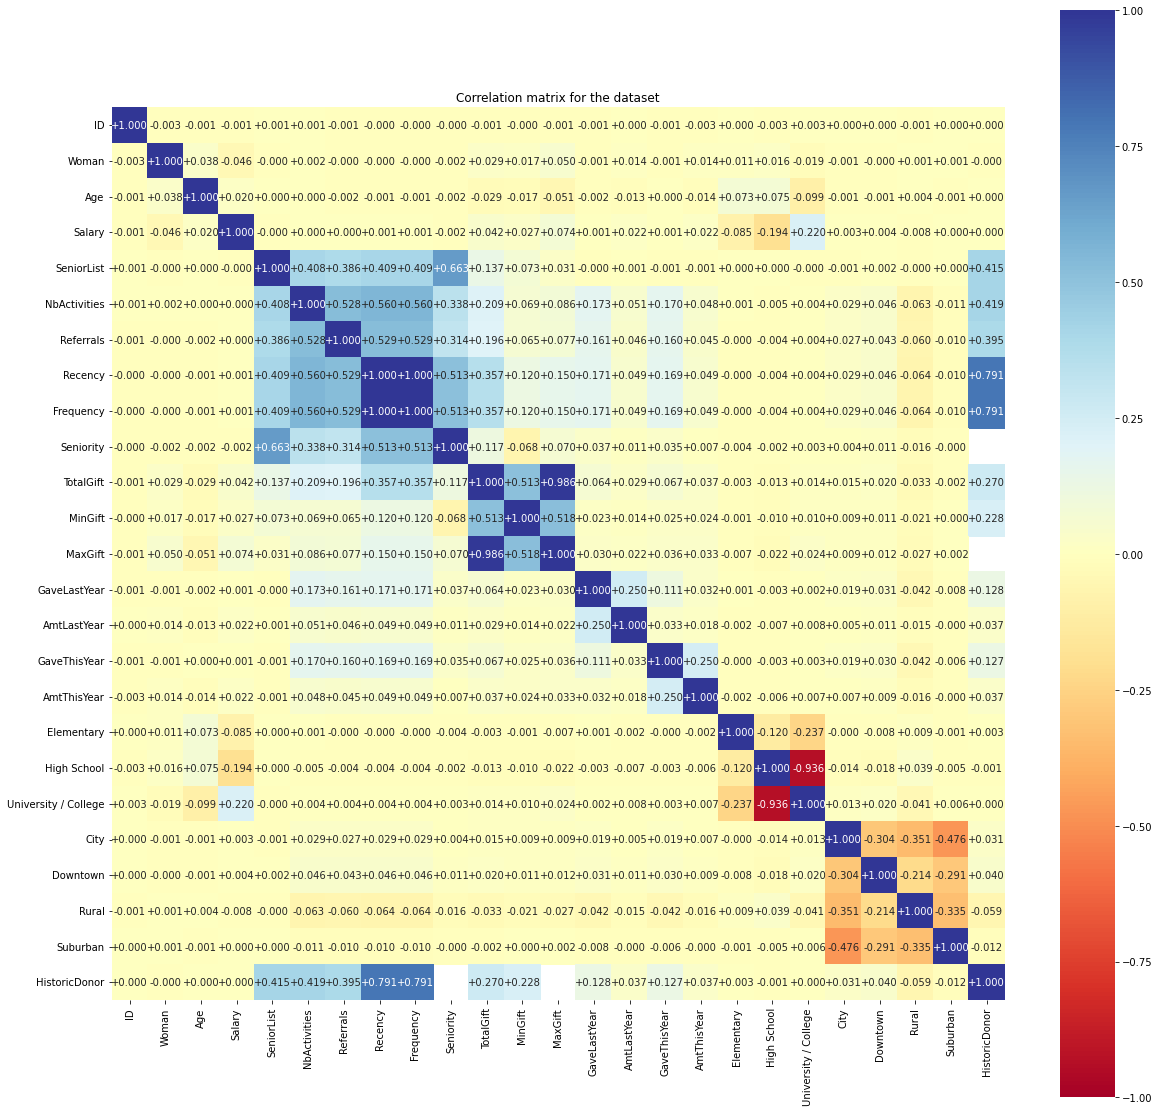

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_mergeX.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the dataset")

## Data Partition

In [ ]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_mergeX, test_size=0.4, random_state = 12345) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,...,GaveThisYear,AmtThisYear,Elementary,High School,University / College,City,Downtown,Rural,Suburban,HistoricDonor
451140,2451141.0,ESPINOSA,DENISE,1.0,41.0,128900.0,8.0,3.0,2.0,2.0,...,0.0,0.0,0,0,1,1,0,0,0,1
911162,2911163.0,GRIFFITHS,RAYMOND,0.0,41.0,23900.0,7.0,0.0,0.0,3.0,...,0.0,0.0,0,1,0,0,0,0,1,1


In [ ]:
# v2

X_train = train[['Age', 'Salary', 'Referrals', 'TotalGift', 'AmtLastYear', 'Woman', 'NbActivities']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary', 'Referrals', 'TotalGift', 'AmtLastYear', 'Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

In [ ]:
# v5-4

X_train = train[['Age', 'Salary', 'Referrals', 'TotalGift', 'AmtLastYear', 'Woman', 'NbActivities', 'Elementary', 'High School',	'University / College']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary', 'Referrals', 'TotalGift', 'AmtLastYear', 'Woman', 'NbActivities', 'Elementary', 'High School',	'University / College']] 
Y_valid = validation['AmtThisYear']

In [ ]:
# v6

X_train = train[['Age', 'Salary', 'Referrals', 'TotalGift', 'AmtLastYear', 'Woman', 'NbActivities', 'Elementary', 'High School',	'University / College', 'HistoricDonor']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary', 'Referrals', 'TotalGift', 'AmtLastYear', 'Woman', 'NbActivities', 'Elementary', 'High School',	'University / College', 'HistoricDonor']] 
Y_valid = validation['AmtThisYear']

In [ ]:
# v7

X_train = train[['Age', 'Salary', 'Referrals', 'TotalGift', 'AmtLastYear', 'Frequency','Woman', 'NbActivities', 'Elementary', 'High School',	'University / College', 'HistoricDonor']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary', 'Referrals', 'TotalGift', 'AmtLastYear', 'Frequency','Woman', 'NbActivities', 'Elementary', 'High School',	'University / College', 'HistoricDonor']] 
Y_valid = validation['AmtThisYear']

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_valid = scaler.transform(X_valid)


## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [ ]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.19618728919964
7602.302825113678
87.19118547831357


## **Regression Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid, DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid, DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid, DT_predict)))

13.245001501995782
7610.153746659898
87.23619516381889


## **XGB Boost Model**

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', max_depth = '3', learning_rate = '.1').fit(X_train, Y_train)
XGB_predict = xgb_model.predict(X_valid)


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,XGB_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,XGB_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,XGB_predict)))

13.185306042182148
7602.615495425315
87.19297847547884


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## Tuning

### Tuning Tree Model

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
           
from sklearn.model_selection import GridSearchCV


In [ ]:
tuning_model=GridSearchCV(DT_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [ ]:
from datetime import datetime

#start_time=timer(None)

#tuning_model.fit(X_train,Y_train)

#timer(start_time)

## Scoring New Data

### Prepare data for scoring

In [ ]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [ ]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")
scoring_data.rename(columns={"City": "Location"}, inplace = True)

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0) 

scoring_data[['HistoricDonor']] = scoring_data[['Frequency']].notna().astype(int)
scoring_data[['Frequency']] = scoring_data[['Frequency']].fillna(value=0)  

scoring_data[['TotalGift']] = scoring_data[['TotalGift']].fillna(value=0) 


scoring_data = dummies(scoring_data, "Education")
scoring_data = dummies(scoring_data, "Location")


scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,...,MinGift,MaxGift,HistoricDonor,Elementary,High School,University / College,City,Downtown,Rural,Suburban
0,2000001.0,0.0,0.0,ROMMES,RODNEY,0.0,25.0,107200.0,2.0,0.0,...,10.0,1000.0,1,0,0,1,1,0,0,0
1,2000002.0,0.0,0.0,RAMIREZ,SHARON,1.0,38.0,15800.0,4.0,1.0,...,0.0,NaN,0,0,1,0,0,0,1,0
2,2000003.0,0.0,0.0,TSOSIE,KAREN,1.0,37.0,57400.0,5.0,0.0,...,0.0,NaN,0,0,0,1,0,0,1,0
3,2000004.0,0.0,0.0,LEE,MARY,1.0,78.0,23700.0,3.0,0.0,...,0.0,NaN,0,0,1,0,0,0,1,0
4,2000005.0,0.0,0.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,8.0,0.0,...,0.0,NaN,0,0,0,1,0,0,1,0


In [ ]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[['Age', 'Salary', 'Referrals', 'TotalGift', 'AmtLastYear', 'Woman', 'NbActivities', 'Elementary', 'High School',	'University / College', 'HistoricDonor']]
#X_scaled = scaler.transform(X)

#regr_predict_end=xgb_model.predict(X)
regr_predict_end=xgb_model.predict(X)

scoring_data['Prediction'] = regr_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.head(5)

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,SeniorList,NbActivities,...,MaxGift,HistoricDonor,Elementary,High School,University / College,City,Downtown,Rural,Suburban,Prediction
501824,2501825.0,1.0,5000.0,MARTINEZ,FRANK,0.0,41.0,212600.0,0.0,0.0,...,NaN,0,0,0,1,0,0,1,0,1003.293579
981782,2981783.0,1.0,350.0,SILK,RONALD,0.0,26.0,212700.0,6.0,2.0,...,100.0,1,0,1,0,0,0,0,1,1001.447083
537220,2537221.0,1.0,10000.0,BROWN,JEFFREY,0.0,48.0,212700.0,0.0,0.0,...,100.0,1,0,0,1,0,0,0,1,1001.003418
163567,2163568.0,1.0,150.0,WHEELER,CHARLES,0.0,45.0,212600.0,8.0,2.0,...,100.0,1,0,0,1,0,0,1,0,994.974243
589156,2589157.0,1.0,150.0,DUPUIS,RICHARD,0.0,75.0,212700.0,3.0,0.0,...,40.0,1,0,0,1,1,0,0,0,994.002625


## Exporting Results to a CSV File

In [ ]:
Result= scoring_data[['ID','Prediction']]
Result.to_csv('Predictions.csv', index=False)

In [ ]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 60000
submission = Result.head(NB)
submission["ID"].astype(int).to_csv('Results_R1.csv', index=False)

In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.
